In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer
# from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy import stats
import pyhere


In [220]:
dir_data_raw = pyhere.here().resolve().joinpath("data", "raw")
dir_data_interim = pyhere.here().resolve().joinpath("data", "interim")
dir_data_external = pyhere.here().resolve().joinpath("data", "external")

In [221]:
csv_power_plants = pd.read_csv(dir_data_interim/"power_plants_with_generation_transformed.csv", index_col=[0])

In [222]:
df_transformed = pd.read_csv(dir_data_external/"v2_transformed_data_combined_with_nasa.csv", index_col=['index'])
df_transformed

,latitude,longitude,ANN_ALLSKY_KT_2012,ANN_ALLSKY_KT_2013,ANN_ALLSKY_KT_2014,ANN_ALLSKY_KT_2015,ANN_ALLSKY_KT_2016,ANN_ALLSKY_KT_2017,ANN_ALLSKY_KT_2018,ANN_ALLSKY_KT_2019,...,winter_WS50M_MAX_AVG_2018,winter_WS50M_MAX_AVG_2019,winter_WS50M_MIN_AVG_2012,winter_WS50M_MIN_AVG_2013,winter_WS50M_MIN_AVG_2014,winter_WS50M_MIN_AVG_2015,winter_WS50M_MIN_AVG_2016,winter_WS50M_MIN_AVG_2017,winter_WS50M_MIN_AVG_2018,winter_WS50M_MIN_AVG_2019
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,0.69,0.70,0.70,0.68,0.71,0.71,0.70,0.69,...,6.966667,6.850000,1.283333,1.003333,1.023333,1.006667,0.950000,1.320000,1.176667,1.176667
1,31.6700,65.7950,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,7.606667,7.903333,1.663333,1.473333,1.290000,1.520000,1.543333,1.613333,1.476667,1.603333
2,31.6230,65.7920,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,7.606667,7.903333,1.663333,1.473333,1.290000,1.520000,1.543333,1.613333,1.476667,1.603333
3,34.5560,69.4787,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,5.126667,5.426667,1.870000,1.380000,1.606667,1.260000,1.473333,1.873333,1.210000,1.516667
4,34.6410,69.7170,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,4.650000,4.740000,1.616667,1.020000,1.063333,0.743333,0.936667,1.336667,0.916667,0.923333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,-12.9667,28.6333,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,6.050000,5.556667,2.056667,2.323333,2.373333,2.510000,1.760000,2.160000,2.183333,1.750000
34932,-12.8167,28.2000,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,6.076667,5.696667,2.090000,2.503333,2.360000,2.596667,1.806667,2.246667,2.200000,1.790000
34933,-17.9167,25.8500,0.62,0.62,0.61,0.64,0.62,0.59,0.62,0.65,...,6.873333,7.233333,2.180000,2.910000,2.400000,3.120000,2.076667,2.496667,2.300000,2.903333


In [223]:
df_transformed.columns

Index(['latitude', 'longitude', 'ANN_ALLSKY_KT_2012', 'ANN_ALLSKY_KT_2013',
       'ANN_ALLSKY_KT_2014', 'ANN_ALLSKY_KT_2015', 'ANN_ALLSKY_KT_2016',
       'ANN_ALLSKY_KT_2017', 'ANN_ALLSKY_KT_2018', 'ANN_ALLSKY_KT_2019',
       ...
       'winter_WS50M_MAX_AVG_2018', 'winter_WS50M_MAX_AVG_2019',
       'winter_WS50M_MIN_AVG_2012', 'winter_WS50M_MIN_AVG_2013',
       'winter_WS50M_MIN_AVG_2014', 'winter_WS50M_MIN_AVG_2015',
       'winter_WS50M_MIN_AVG_2016', 'winter_WS50M_MIN_AVG_2017',
       'winter_WS50M_MIN_AVG_2018', 'winter_WS50M_MIN_AVG_2019'],
      dtype='object', length=282)

In [224]:
# csv_power_plants.loc[0:34935, ['capacity_mw', 'primary_fuel_transformed']].index.name = "index"
csv_power_plants.index.rename('index', inplace=True)
csv_power_plants


,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,primary_fuel_transformed
index,,,,,,,,,,,
0,33.0,32.3220,65.1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
1,10.0,31.6700,65.7950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
2,10.0,31.6230,65.7920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
3,66.0,34.5560,69.4787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
4,100.0,34.6410,69.7170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...
34931,50.0,-12.9667,28.6333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
34932,20.0,-12.8167,28.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
34933,108.0,-17.9167,25.8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [225]:
columns_to_combine = [
                        'capacity_mw',
                        'primary_fuel_transformed',
                        'generation_gwh_2013',
                        'generation_gwh_2014',
                        'generation_gwh_2015',
                        'generation_gwh_2016',
                        'generation_gwh_2017',
                        'generation_gwh_2018',
                        'generation_gwh_2019'
                    ]
# df_transformed_combined = df_transformed.merge(csv_power_plants.loc[0:24360, ['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")
df_transformed_combined = df_transformed.merge(csv_power_plants[columns_to_combine],left_on="index", right_on="index")

In [226]:
df_transformed_combined

,latitude,longitude,ANN_ALLSKY_KT_2012,ANN_ALLSKY_KT_2013,ANN_ALLSKY_KT_2014,ANN_ALLSKY_KT_2015,ANN_ALLSKY_KT_2016,ANN_ALLSKY_KT_2017,ANN_ALLSKY_KT_2018,ANN_ALLSKY_KT_2019,...,winter_WS50M_MIN_AVG_2019,capacity_mw,primary_fuel_transformed,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,0.69,0.70,0.70,0.68,0.71,0.71,0.70,0.69,...,1.176667,33.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31.6700,65.7950,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,1.603333,10.0,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31.6230,65.7920,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,1.603333,10.0,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34.5560,69.4787,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,1.516667,66.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34.6410,69.7170,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,0.923333,100.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,-12.9667,28.6333,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,1.750000,50.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34932,-12.8167,28.2000,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,1.790000,20.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34933,-17.9167,25.8500,0.62,0.62,0.61,0.64,0.62,0.59,0.62,0.65,...,2.903333,108.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


primary_fuel_transformed
Other                       18917
Solar                       10665
Wind                         5344
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

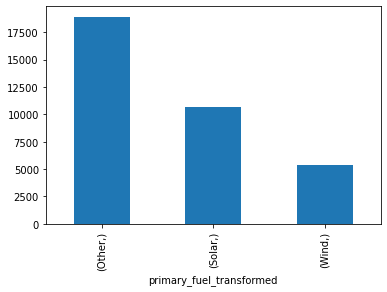

In [227]:
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [228]:
df_transformed_combined = df_transformed_combined.loc[df_transformed_combined['generation_gwh_2013'].notna() & df_transformed_combined['generation_gwh_2014'].notna() & df_transformed_combined['generation_gwh_2015'].notna() & df_transformed_combined['generation_gwh_2016'].notna() & df_transformed_combined['generation_gwh_2017'].notna() & df_transformed_combined['generation_gwh_2018'].notna() & df_transformed_combined['generation_gwh_2019'].notna()]

primary_fuel_transformed
Other                       4651
Wind                         767
Solar                        612
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

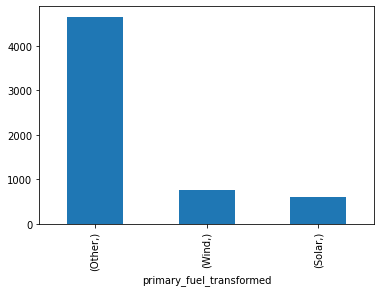

In [229]:
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [230]:
label_encoder = LabelEncoder()
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
df_transformed_combined.dropna(inplace = True)
df_transformed_combined['code_prim_fuel_transf'] = label_encoder.fit_transform(df_transformed_combined['primary_fuel_transformed'])


/tmp/ipykernel_771/2191278475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_combined.dropna(inplace = True)
/tmp/ipykernel_771/2191278475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_combined['code_prim_fuel_transf'] = label_encoder.fit_transform(df_transformed_combined['primary_fuel_transformed'])


In [231]:
df_target_equivalent = df_transformed_combined[['primary_fuel_transformed', 'code_prim_fuel_transf']].drop_duplicates()
df_target_equivalent

,primary_fuel_transformed,code_prim_fuel_transf
index,,
24713,Solar,1
24717,Other,0
24749,Wind,2


## Balancing the data

In [232]:
index_rows_to_delete_other = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(4000).index
# index_rows_to_delete = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(14000).index
# index_rows_to_delete = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(9000).index
index_rows_to_delete_wind = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 2].sample(100).index
# index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(5500).index
# index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(3000).index


In [233]:
df_transformed_combined.drop(index_rows_to_delete_other, axis = 0, inplace = True)
df_transformed_combined.drop(index_rows_to_delete_wind, axis = 0, inplace = True)

/tmp/ipykernel_771/1717249743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_combined.drop(index_rows_to_delete_other, axis = 0, inplace = True)
/tmp/ipykernel_771/1717249743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_combined.drop(index_rows_to_delete_wind, axis = 0, inplace = True)


<AxesSubplot:xlabel='primary_fuel_transformed'>

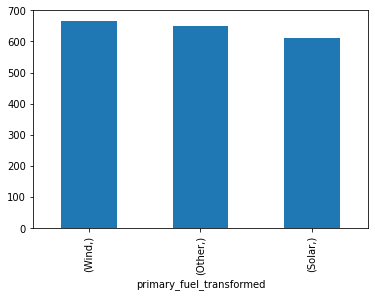

In [234]:
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [235]:
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
# df_transformed_combined.dropna(inplace = True)
columns_to_drop = [
                        'capacity_mw',
                        'latitude',
                        'longitude',
                        'primary_fuel_transformed',
                        'generation_gwh_2013',
                        'generation_gwh_2014',
                        'generation_gwh_2015',
                        'generation_gwh_2016',
                        'generation_gwh_2017',
                        'generation_gwh_2018',
                        'generation_gwh_2019'
                    ]
pre_X = df_transformed_combined.drop(columns=columns_to_drop)
X = pre_X.drop(columns=['code_prim_fuel_transf'])
y = pre_X['code_prim_fuel_transf']

In [236]:
y

index
24713    1
24715    1
24716    1
24719    1
24730    1
        ..
34501    0
34507    0
34512    1
34531    0
34542    0
Name: code_prim_fuel_transf, Length: 1930, dtype: int64

In [237]:
# sns.kdeplot(data=pre_X, x='winter_TQV_2009', hue='code_prim_fuel_transf', shade=True)

In [238]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [239]:
def get_accuracy(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [240]:
def get_accuracy_knn(n_neighbors, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [241]:
mi_scores = make_mi_scores(X, y)
mi_scores[::3]

autumn_WS50M_MAX_AVG_2013        0.440623
spring_WS50M_MAX_AVG_2017        0.434969
spring_WS50M_MAX_AVG_2015        0.429686
autumn_ALLSKY_SFC_SW_DWN_2015    0.429390
autumn_WS10M_MAX_AVG_2013        0.424880
                                   ...   
summer_ALLSKY_KT_2019            0.208501
ANN_ALLSKY_KT_2015               0.198899
winter_ALLSKY_KT_2015            0.170183
ANN_ALLSKY_KT_2018               0.144542
ANN_ALLSKY_KT_2019               0.113012
Name: MI Scores, Length: 94, dtype: float64

In [242]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

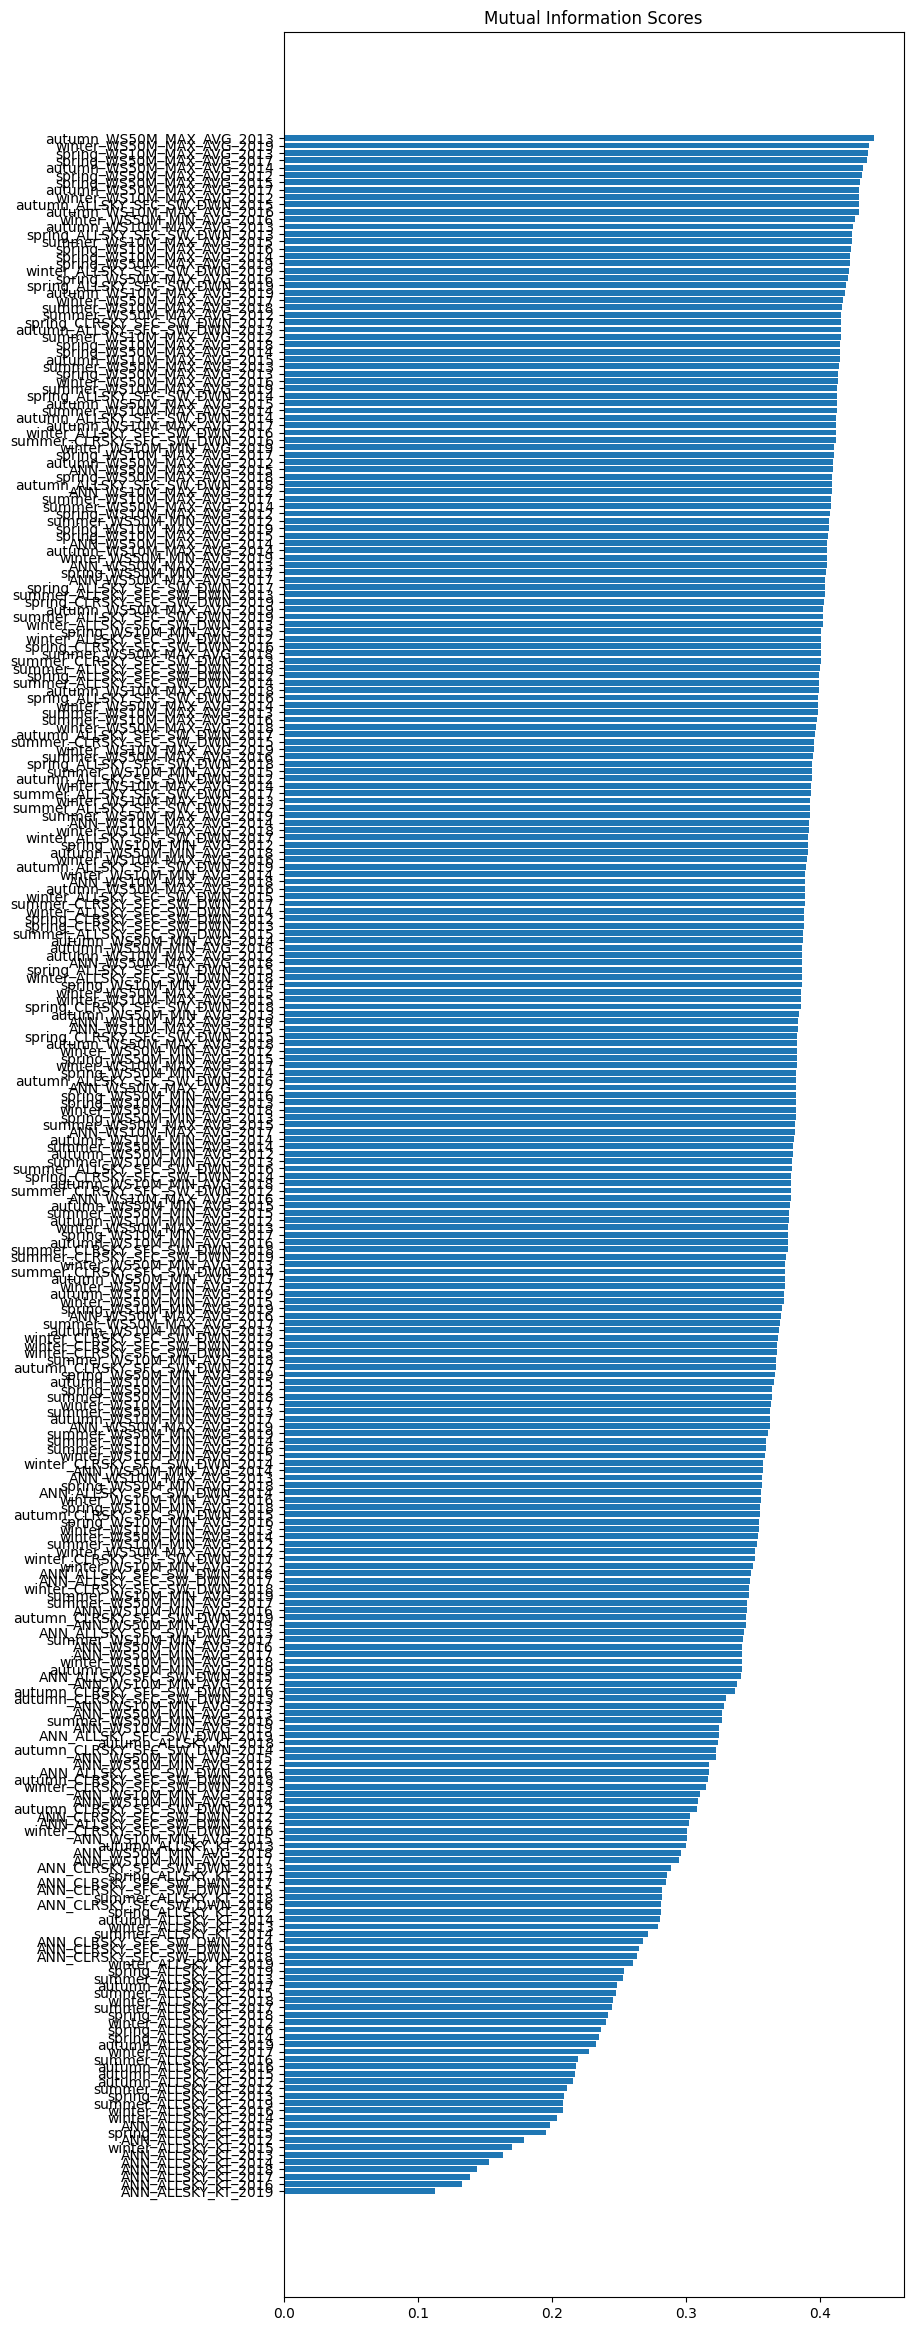

In [243]:
plt.figure(dpi=100, figsize=(8, 30))
plot_mi_scores(mi_scores)

In [25]:
 columns_delete = X.columns.str.contains('ALLSKY_KT')
 X = X.loc[:,~columns_delete]

In [244]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

## DECISION TREE CLASSIFIER

500


<AxesSubplot:>

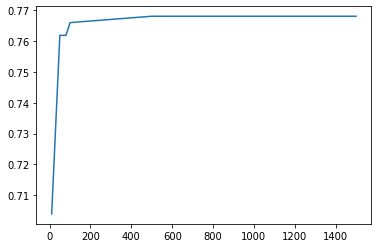

In [245]:
candidate_max_leaf_nodes = [10, 50, 80, 100, 500, 1200, 1500]
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {node: get_accuracy(node, train_X, val_X, train_y, val_y) for node in candidate_max_leaf_nodes}
# results = {node: get_accuracy(node, train_X_scaled_pca, val_X_scaled_pca, train_y, val_y) for node in candidate_max_leaf_nodes}
# for node in candidate_max_leaf_nodes:
#     results[node] = get_accuracy(node, X_train, X_test, y_train, y_test)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = max(results, key=results.get)
print(best_tree_size)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [246]:
tree_model = DecisionTreeClassifier(max_leaf_nodes = best_tree_size, random_state=0)
tree_model.fit(train_X, train_y)
y_pred = tree_model.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

<AxesSubplot:>

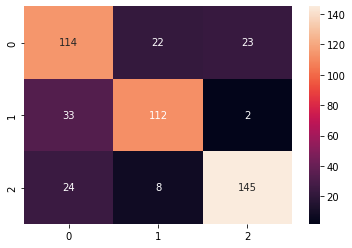

In [247]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [248]:
accuracy_score(val_y, y_pred)

0.7681159420289855

In [249]:
precision_score(val_y, y_pred, average='weighted')

0.7720791929754142

In [250]:
tree_model.score(val_X, val_y)

0.7681159420289855

In [251]:
# tree.plot_tree(tree_model)

# RANDOM FOREST CLASSIFIER

In [252]:
# Numbers of trees
n_estimators = [int(x) for x in np.arange(10, 101, 10)]
# Numbers of features to consider at every split
max_features = [1, "sqrt", "log2"]
# Maximum numbers of levels in tree
max_depth = [50, 100, 500]
# Minimum numbers of samples required to split a node
min_samples_split = [2, 10, 50, 100, 500]
# Minimum numbers of samples required at each leaf node
min_samples_leaf = [100, 500, 1000, 1500]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_leaf_nodes = [1000, 1500, 1700]

param_grid = {
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap,
                'max_leaf_nodes': max_leaf_nodes
            }



In [253]:
rf_model = RandomForestClassifier(random_state=0)
# rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)
rf_grid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, n_iter = 50, cv=5, verbose = 2, n_jobs=4)

In [254]:
# rf_grid.fit(train_X_scaled_pca, train_y)
rf_grid.fit(train_X, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=500, max_features=sqrt, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=500, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=500, max_features=sqrt, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=500, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=500, max_features=sqrt, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=500, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=500, max_features=sqrt, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=500, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=500, max_features=sqrt, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=500, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=1, max_leaf_nodes=1500, min_samples_leaf=1500, min_samples_split=50, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=50, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 100, 500],
                                        'max_features': [1, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [1000, 1500, 1700],
                                        'min_samples_leaf': [100, 500, 1000,
                                                             1500],
                                        'min_samples_split': [2, 10, 50, 100,
                                                              500],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [255]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 50,
 'min_samples_leaf': 100,
 'max_leaf_nodes': 1500,
 'max_features': 'log2',
 'max_depth': 500,
 'bootstrap': False}

In [256]:
rf_grid.score(val_X, val_y)
# rf_grid.score(val_X_scaled_pca, val_y)

0.7122153209109731

In [56]:
rf_model2 = RandomForestClassifier(bootstrap= False,
 max_depth= 100,
 max_features= 'sqrt',
 min_samples_leaf= 100,
 min_samples_split= 100,
 n_estimators= 100,
 max_leaf_nodes= 1000,
 random_state=0)
rf_model2.fit(train_X, train_y)
y_pred = rf_model2.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

<AxesSubplot:>

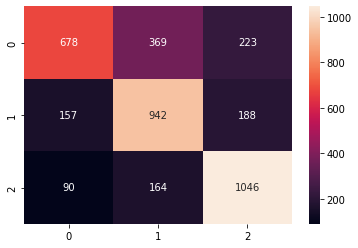

In [57]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [58]:
accuracy_score(val_y, y_pred)

0.6912107855846513

In [59]:
rf_model2.score(val_X, val_y)

0.6912107855846513

2    1300
1    1287
0    1270
Name: code_prim_fuel_transf, dtype: int64


<AxesSubplot:>

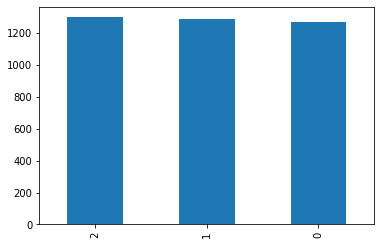

In [60]:
print(val_y.value_counts())
val_y.value_counts().plot.bar()

# XGBOOST

In [257]:
xgbclass_model_1 = XGBClassifier(random_state=0)
xgbclass_model_1.fit(train_X, train_y)
# xgbclass_model_1.fit(train_X_scaled_pca, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [259]:
# y_pred = xgbclass_model_1.predict(val_X_scaled_pca)
y_pred = xgbclass_model_1.predict(val_X)

In [260]:
# xgbclass_model_1.score(val_X_scaled_pca, val_y)
xgbclass_model_1.score(val_X, val_y)

0.7701863354037267

<AxesSubplot:>

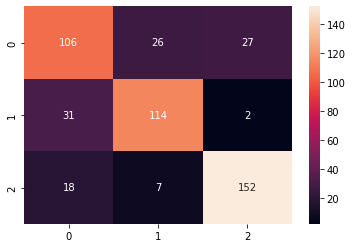

In [261]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [262]:
xgbclass_model_2 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4, early_stopping_rounds=5)
xgbclass_model_2.fit(train_X, train_y, 
             eval_set=[(val_X, val_y)], 
             verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=5, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [264]:
y_pred = xgbclass_model_2.predict(val_X)

In [265]:
xgbclass_model_2.score(val_X, val_y)

0.8012422360248447

<AxesSubplot:>

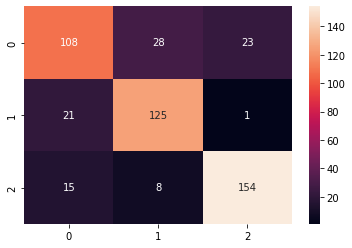

In [266]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# KNN

7


<AxesSubplot:>

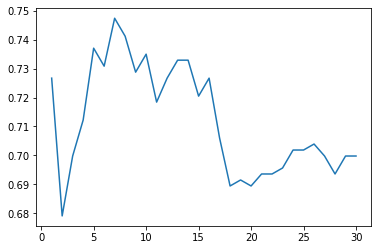

In [267]:
candidate_n_neighbors = np.arange(1,31)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


# results = {n: get_accuracy_knn(n, train_X_scaled_pca, val_X_scaled_pca, train_y, val_y) for n in candidate_n_neighbors}
results = {n: get_accuracy_knn(n, train_X, val_X, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [268]:
knn_model_1 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_1.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=7)

In [269]:
knn_model_1.score(val_X, val_y)

0.7474120082815735

In [270]:
# train_X_normalized = stats.boxcox(train_X)
x = train_X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')
# x_scaled = min_max_scaler.fit_transform(x)
x_scaled = power_transformer.fit_transform(x)
train_X_scaled = pd.DataFrame(x_scaled, index=train_X.index, columns=train_X.columns)

x = val_X.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
x_scaled = power_transformer.fit_transform(x)
val_X_scaled = pd.DataFrame(x_scaled, index=val_X.index, columns=val_X.columns)


In [271]:
train_X_scaled

,ANN_ALLSKY_KT_2012,ANN_ALLSKY_KT_2013,ANN_ALLSKY_KT_2014,ANN_ALLSKY_KT_2015,ANN_ALLSKY_KT_2016,ANN_ALLSKY_KT_2017,ANN_ALLSKY_KT_2018,ANN_ALLSKY_KT_2019,ANN_ALLSKY_SFC_SW_DWN_2012,ANN_ALLSKY_SFC_SW_DWN_2013,...,winter_WS50M_MAX_AVG_2018,winter_WS50M_MAX_AVG_2019,winter_WS50M_MIN_AVG_2012,winter_WS50M_MIN_AVG_2013,winter_WS50M_MIN_AVG_2014,winter_WS50M_MIN_AVG_2015,winter_WS50M_MIN_AVG_2016,winter_WS50M_MIN_AVG_2017,winter_WS50M_MIN_AVG_2018,winter_WS50M_MIN_AVG_2019
index,,,,,,,,,,,,,,,,,,,,,
25756,0.803289,1.212643,0.982932,0.982497,0.769373,0.860865,1.056463,0.959295,0.360284,0.789042,...,-1.500187,-1.484343,-1.651140,-1.377054,-1.400908,-1.554086,-1.686271,-1.439956,-1.562498,-1.479389
26115,-0.967959,-0.582353,-0.642524,-0.754019,-0.538449,-1.203544,-0.848155,-0.589102,-0.888272,-0.690177,...,0.303304,0.156769,0.361288,0.488602,0.749480,0.289139,0.502073,0.662134,0.692054,0.461532
31597,1.563363,1.366949,1.362222,1.302706,1.542297,1.581400,1.418810,1.380946,1.671827,1.504837,...,-0.748351,-0.368053,-0.550326,-1.068089,-0.838704,-1.166939,-0.792234,-0.333047,-1.065768,-0.710480
27321,-1.176632,-0.991481,-1.069759,-0.754019,-0.963525,-1.203544,-1.233267,-1.015482,-1.145016,-1.010301,...,-1.286622,-1.339319,-0.632541,-0.536703,-0.491139,-0.722010,-0.690984,-0.656537,-0.583647,-0.472057
31129,0.255992,0.737471,0.370938,0.586600,0.184822,0.481943,0.507144,0.438537,0.252432,0.643641,...,-0.128374,0.152452,0.781437,0.954416,0.462437,0.850430,0.780480,0.847304,0.790219,1.062529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29153,0.255992,0.737471,0.370938,0.586600,0.184822,0.481943,0.507144,0.438537,0.252432,0.643641,...,-0.370261,-0.125484,0.942491,0.983720,0.621392,0.703399,0.956144,0.898266,0.821564,1.160762
31084,1.563363,1.504457,1.596594,1.638154,1.632111,1.581400,1.578505,1.561241,1.604020,1.522347,...,-0.209289,-0.085624,-0.720865,-0.603939,-0.392962,-0.140911,-0.059687,-0.333047,-0.171102,0.079237
33061,1.563363,1.292032,1.362222,1.203346,1.244305,1.297645,1.418810,1.380946,1.454976,1.305395,...,-0.033827,0.093995,-0.285866,-0.785059,-0.709267,-0.755524,-0.599801,-0.911024,-1.057120,-0.747168


In [272]:
def axis_calculation(total_columns_df, grid_columns):
    rows = int(total_columns_df / grid_columns)
    if( total_columns_df % grid_columns) > 0:
        rows += 1

    return (rows, grid_columns)
print(axis_calculation(30, 4))

(8, 4)


In [273]:

# # plt.figure(figsize=(200,200))
# grid_columns = 5
# result_axis = axis_calculation(len(train_X_scaled.columns), grid_columns)
# fig, axs = plt.subplots(result_axis[0],result_axis[1], figsize=(30,20))
# fig.subplots_adjust(hspace=.5)

# aux_cont = 0
# aux_cont_2 = 0
# # fig.figsize=(30,30)
# for col in train_X_scaled.columns:
# # #     # print(col)
#     sns.kdeplot(data=train_X_scaled, x=col, shade=True, ax=axs[aux_cont_2, aux_cont] )
#     # axs[aux_cont_2, aux_cont].set_xlabel('Participation Rate')
#     # axs[aux_cont_2, aux_cont].set_ylabel('Frequency')
#     # axs[aux_cont_2, aux_cont].set_title("sasa")
#     axs[aux_cont_2, aux_cont].set_xticklabels([])
#     aux_cont += 1
#     if aux_cont >= grid_columns:
#         aux_cont_2 +=1
#         aux_cont = 0

In [274]:
# train_X_scaled.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))


In [275]:
# WITHOUT SCALING OR NORMALIZING
# train_X.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))

5


<AxesSubplot:>

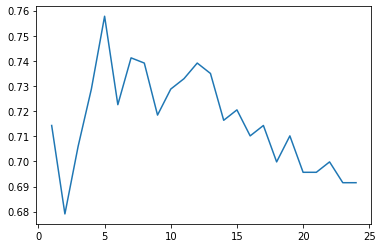

In [276]:
candidate_n_neighbors = np.arange(1,25)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {n: get_accuracy_knn(n, train_X_scaled, val_X_scaled, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [277]:
knn_model_2 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_2.fit(train_X_scaled, train_y)

KNeighborsClassifier()

In [278]:
knn_model_2.score(val_X_scaled, val_y)

0.7577639751552795

In [279]:
y_pred = knn_model_2.predict(val_X_scaled)

<AxesSubplot:>

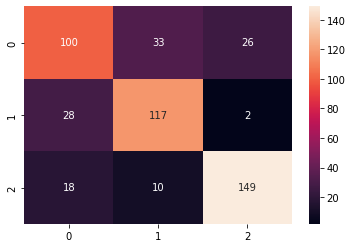

In [280]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# NAIVE BAYES

0.5734989648033126


<AxesSubplot:>

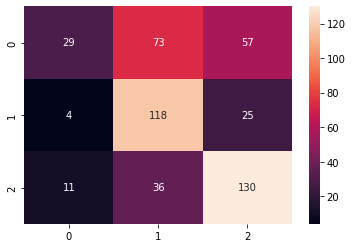

In [281]:
nb_model_1 = GaussianNB()

#Entreno el modelo
nb_model_1.fit(train_X, train_y)

#Realizo una predicción
y_pred = nb_model_1.predict(val_X)
print(nb_model_1.score(val_X, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

0.5610766045548654


<AxesSubplot:>

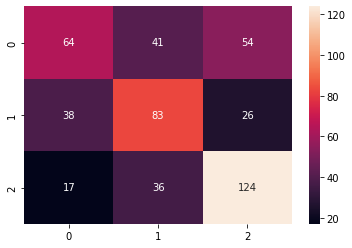

In [282]:
nb_model_2 = GaussianNB()
nb_model_2.fit(train_X_scaled, train_y)
print(nb_model_2.score(val_X_scaled, val_y))
y_pred = nb_model_2.predict(val_X_scaled)

confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# SVM

In [283]:
svm_model_1 = SVC(random_state=22)
svm_model_1.fit(train_X_scaled, train_y)

SVC(random_state=22)

In [284]:
y_pred = svm_model_1.predict(val_X_scaled)

In [285]:
svm_model_1.score(val_X_scaled, val_y)

0.7122153209109731

<AxesSubplot:>

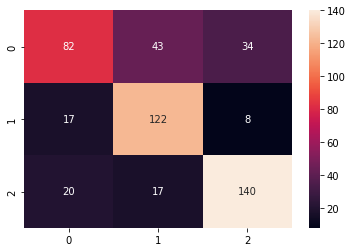

In [286]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [287]:
param_grid = {
                'C': [0.5, 1, 10, 100], # NOTE: values for C must be > 0
                'gamma': ['scale', 1, .1, .01, .001, .0001],
                'kernel': ['rbf'] # Some linear fittings last to 7/8 mins. Not recommended at all
            }
# svm_grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)
svm_grid = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, cv=5, verbose = 2, n_jobs=4)

In [288]:
svm_grid.fit(train_X_scaled, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.9s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.9s
[CV] END .....................C=0.5, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END .....................C=0.5, gamma=0.001

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=4,
                   param_distributions={'C': [0.5, 1, 10, 100],
                                        'gamma': ['scale', 1, 0.1, 0.01, 0.001,
                                                  0.0001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [289]:
svm_grid.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}

In [290]:
svm_model_2 = SVC(C= 100, gamma= 0.1, kernel='rbf', random_state=22)
svm_model_2.fit(train_X_scaled, train_y)

SVC(C=100, gamma=0.1, random_state=22)

In [291]:
y_pred = svm_model_2.predict(val_X_scaled)

In [292]:
svm_model_2.score(val_X_scaled, val_y)

0.7660455486542443

<AxesSubplot:>

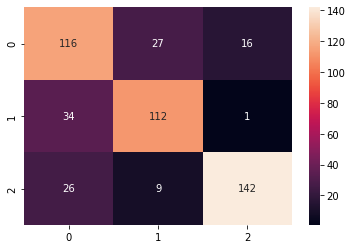

In [293]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# PCA

In [294]:
pca = PCA(n_components=3)
pca.fit(train_X_scaled)

PCA(n_components=3)

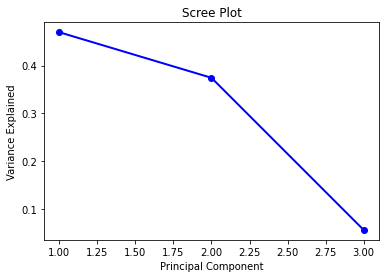

In [295]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [296]:
train_X_scaled_pca = pca.transform(train_X_scaled)
val_X_scaled_pca = pca.transform(val_X_scaled)

In [297]:
train_pc1_coords = train_X_scaled_pca[:,0]
train_pc2_coords = train_X_scaled_pca[:,1]
train_pc3_coords = train_X_scaled_pca[:,2]

# LOGISTIC REGRESSION

0.6832298136645962


/home/tomas/renewable_power_plants/renewable_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

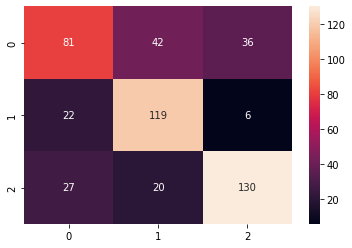

In [298]:
logistic_model_1 = LogisticRegression(random_state=22)
logistic_model_1.fit(train_X, train_y)
y_pred = logistic_model_1.predict(val_X)
print(logistic_model_1.score(val_X, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# LDA

In [299]:
lda = LDA(n_components = 2)
train_X_scaled_lda = lda.fit_transform(train_X_scaled, train_y)
val_X_scaled_lda = lda.transform(val_X_scaled)

0.6749482401656315


<AxesSubplot:>

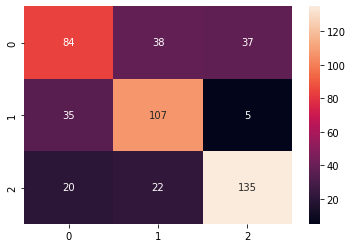

In [300]:
lda.fit(train_X_scaled_lda, train_y)
y_pred = lda.predict(val_X_scaled_lda)
print(lda.score(val_X_scaled_lda, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# TEST PREDICTION

In [355]:
df_to_predict = pd.read_csv(dir_data_external/"data_predict.csv", index_col=['index'])
df_to_predict.drop(columns=['latitude','longitude'], inplace=True)

In [356]:
y_predicted_test = xgbclass_model_2.predict(df_to_predict)
print(y_predicted_test)

[0]


In [357]:
df_target_equivalent

,primary_fuel_transformed,code_prim_fuel_transf
index,,
24713,Solar,1
24717,Other,0
24749,Wind,2
